# Regularization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Prepare data

In [4]:
df = pd.read_csv('Advertising.csv')

In [5]:
X = df.drop('sales', axis=1)

In [6]:
y = df['sales']

## Prepare polynomial data

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynmial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [9]:
poly_features = polynmial_converter.fit_transform(X)

In [10]:
print(X.shape, poly_features.shape)

(200, 3) (200, 19)


## Train test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [13]:
X_train.shape

(140, 19)

## Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Ridge Regression

In [18]:
from sklearn.linear_model import Ridge

In [19]:
ridge_model = Ridge(alpha=10)

In [20]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [21]:
test_predictions = ridge_model.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

0.5774404204714162

In [25]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

0.8946386461319651

How do we know which **alpha** is the best? Use **Cross Validation**

In [27]:
# RidgeCV - Ridge Cross Validation
from sklearn.linear_model import RidgeCV

In [36]:
# Here we can provide several alpha parameters
# Where the best one will be chosen by Cross Validation
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

In [37]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

## To find out which alpha performed the best

In [38]:
ridge_cv_model.alpha_

0.1

Using scorers

In [39]:
from sklearn.metrics import SCORERS

### View all different scoring metrics

- Each scoring metric is trandformed so that Higher is better.
- But higher error (RMSE/MSE) is not good
- So it is made negative
- Higher negative error is good

In [40]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

## Predict and evaluate the Ridge CV model

In [41]:
test_predictions = ridge_cv_model.predict(X_test)

In [43]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

0.4273774884345441

In [44]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

0.6180719926946004

## Inference

### Using Linear Regression
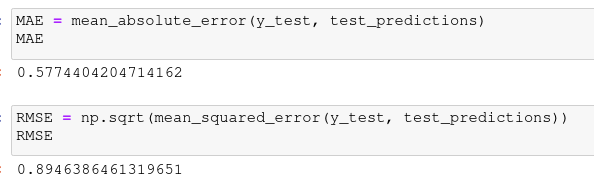

### Using Ridge Regression (alpha=0.1)
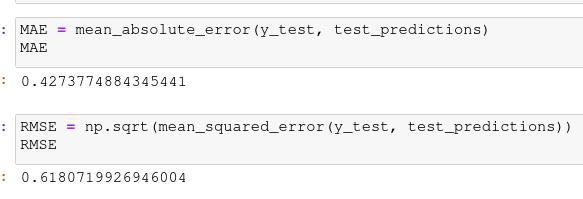

**Note:** Error on test set seems to have reduced, i.e overfitting is reduced

Also none of the coefficients are close to 0. L2 reg cannot reduce a coeff to 0

In [45]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

# LASSO Regression (L1 Regularization)

- Adds penalty value equal to absolute value of magnitude of coefficients
- Some coefficients can become 0 too

Why LASSO?
- Can force some coeff. values to 0
- Models generated from LASSO are much easier to interpret

**LASSO** - Least Absolute Shrinkage and Selection Operator

In [47]:
from sklearn.linear_model import LassoCV

eps - epsilon. smaller the eps value, the wider value we are checking

In [55]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100, cv=5, max_iter=1000000)

In [56]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5, eps=0.1, max_iter=1000000)

In [57]:
lasso_cv_model.alpha_

0.4943070909225832

In [58]:
test_predictions = lasso_cv_model.predict(X_test)

In [59]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

0.6541723161252867

In [60]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

1.1308001022762548

## In this case, LASSO is not performing as good as Ridge or normal Linear Regression

### But what are the benefits

SIMPLICITY

In [61]:
lasso_cv_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

## Almost all coefficients are 0.

- Its impressive that its able to get a reasonable MAE and RMSE with just 2 parameters, it doesnt take in the rest of the parameters
- Makes the model really simple

# Elastic Net (L1 L2 Regularization)

- Combines LASSO and Ridge together

LASSO and Ridge can be shown as

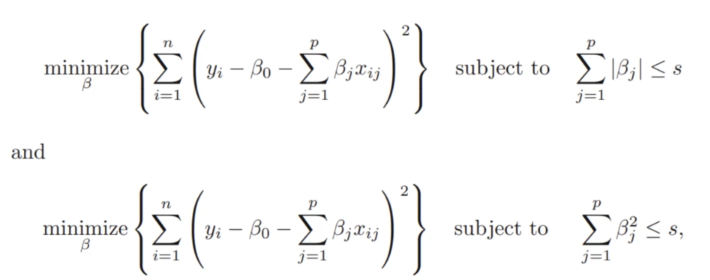

**S** -> some sum that allows us to to reqrite penalty as a requriement

## In that case, taking this example

y_cap = b1*X1 + b2*x2

Then,
- **LASSO**: 
> |b1| + |b2| <= s
- **Ridge**: 
> b1^2 | b2^2 <= s

## Plotting LASSO:

|b1| + |b2| <= s

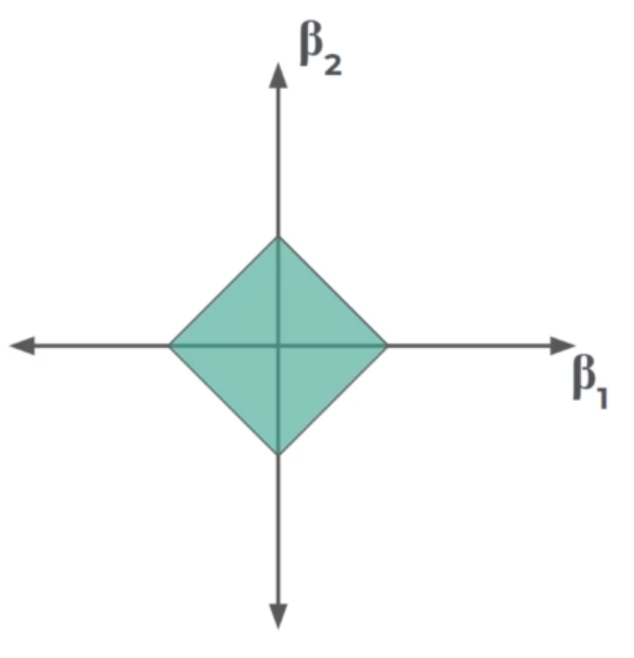

## Plotting Ridge:

b1^2 | b2^2 <= s

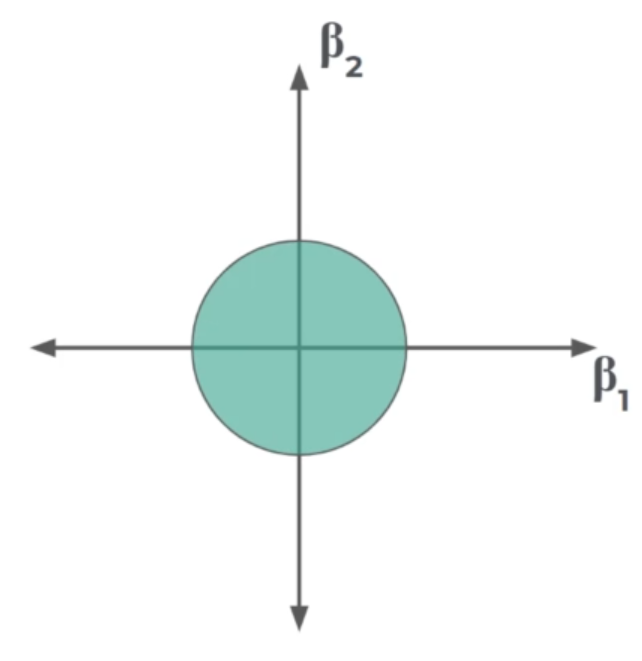

## What Elastic Net is trying to do

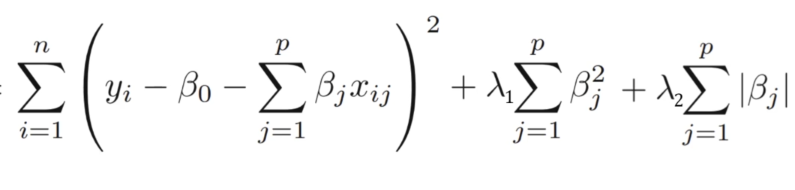

## Alternately

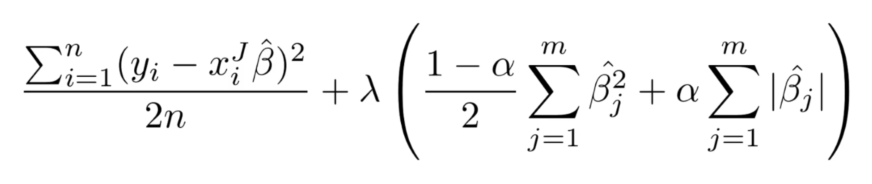

## Simpler way of describing it

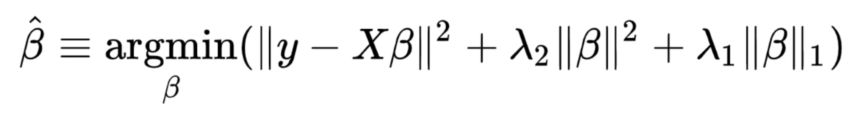

## Elastic net penalty region

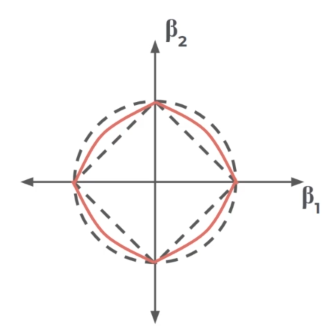

## Implementation in Python

In [62]:
from sklearn.linear_model import ElasticNetCV

l1 -> How much Lasso as compared to Ridge

In [63]:
elastic_model = ElasticNetCV(l1_ratio=[0.1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=100, max_iter=1000000)

In [64]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

### To know the best performing l1 value

In [66]:
# 1.0 -> Chooses LASSO completely
elastic_model.l1_ratio_

1.0

In [67]:
elastic_model.alpha_

0.004943070909225833

In [68]:
lasso_cv_model.alpha_

0.4943070909225832

## In this case elastic model gives same results as LASSO

In [69]:
test_predictions = elastic_model.predict(X_test)

In [70]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

0.4335034618590078

In [71]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

0.6063140748984043